<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/experimental/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!pip install yfinance
import yfinance as yf

In [41]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [42]:
data = yf.download('^nsei',start='2019-01-01',end='2020-12-31')

[*********************100%***********************]  1 of 1 completed


In [43]:
data['ema']=data['Adj Close'].ewm(span=10).mean()
data['S_3'] = data['Adj Close'].shift(1).rolling(window=3).mean() 
data['S_9']= data['Close'].shift(1).rolling(window=9).mean() 
data= data.dropna() 


In [44]:
data=data.dropna()

In [45]:
predict_data= yf.download('^nsei',start='2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [46]:
predict_data['ema']=predict_data['Adj Close'].ewm(span=10).mean()
predict_data['S_3'] = predict_data['Adj Close'].shift(1).rolling(window=3).mean() 
predict_data['S_9']= predict_data['Close'].shift(1).rolling(window=9).mean() 
predict_data=predict_data.dropna()

In [47]:
#Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(data[['ema','S_3','S_9']],data[['Adj Close']], test_size=.2)

In [48]:
from sklearn.linear_model import LinearRegression

# Create Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Use model to make predictions
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[ 2.24121845  0.59381731 -1.80432344]]
Mean Absolute Error: 86.65102688950662
Coefficient of Determination: 0.9881157818909956


In [50]:
prediction=model.predict(predict_data[['ema','S_3','S_9']])

In [51]:
prediction.shape

(263, 1)

In [52]:
predict_data.shape

(263, 9)

In [53]:
cols=['prediction','Adj Close']

In [54]:
final=pd.DataFrame(np.c_[prediction,predict_data['Adj Close'].values])

In [55]:
final.columns=cols

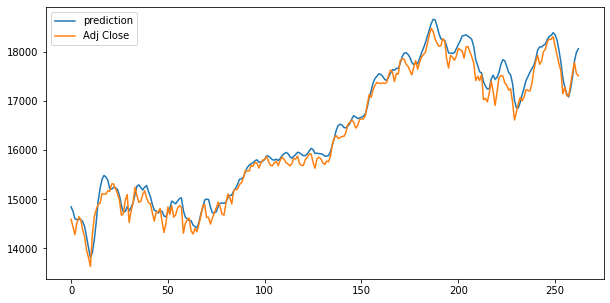

In [58]:
final.plot(figsize=(10,5));